# Anotate images

In [1]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"
%run -i "Line.py"

# Load Camera calibration params
result_Images = pickle.load(open( "pickle_data/result_Images.p", "rb" ) )
[leftLines, rightLines  ] = pickle.load(open( "pickle_data/lines_lane.p", "rb" ) )

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 19746 bytes to 0. Functions_Clases Pipeline.py


In [2]:
index = 1

leftLines[index].measure_real_curvature()
print(leftLines[index].radius_of_curvature)
rightLines[index].measure_real_curvature()
print(rightLines[index].radius_of_curvature)

9601.35546808174
12475.375017276781


1659.4818120941572


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

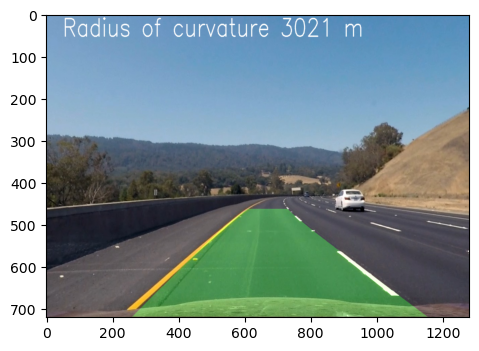

In [3]:
index = 4

#print(leftLines[index].radius_of_curvature)
#print(rightLines[index].radius_of_curvature)


diff, mean, text = checkRadius(leftLines[index], rightLines[index])

result_annotated = cv2.putText(result_Images[index], text, org= (50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                   fontScale=2, color= (255, 255, 255), thickness=2, lineType=cv2.LINE_AA)

print(diff)
displayListImages([result_annotated],cols=2,cmap='gray',figSize=[12,2])

0.0


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

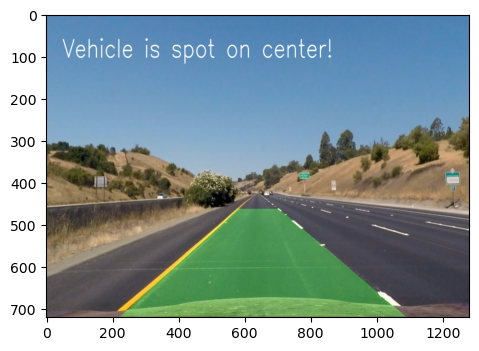

In [4]:
index = 0

dev, text = calculateDeviation(result_Images[index], leftLines[index],rightLines[index],)
print(dev)

result_annotated = cv2.putText(result_Images[index], text, org= (50, 100), fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                   fontScale=2, color= (255, 255, 255), thickness=2, lineType=cv2.LINE_AA)


displayListImages([result_annotated],cols=2,cmap='gray',figSize=[12,2])

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

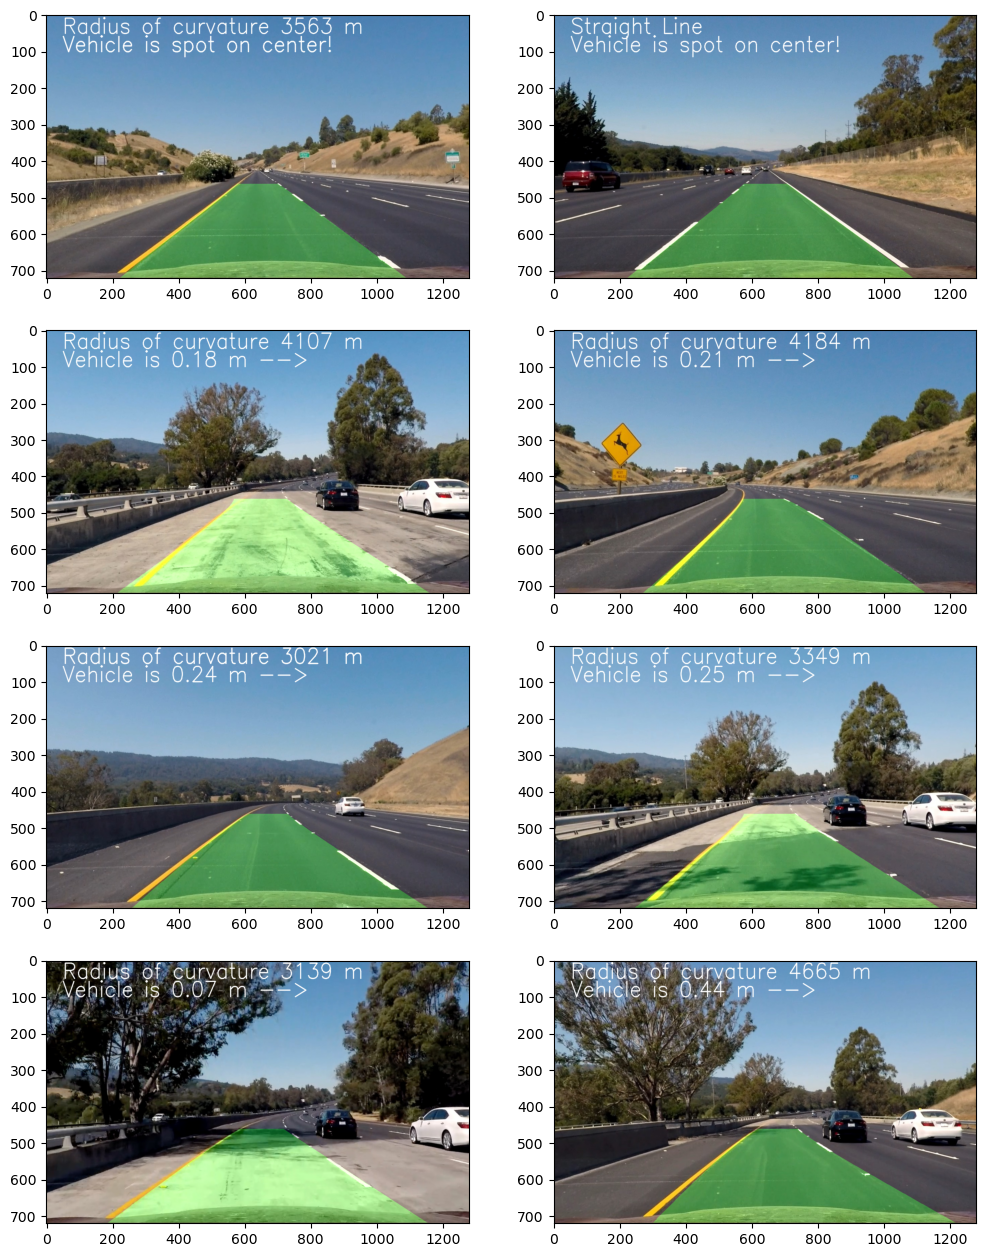

In [5]:
## Anotate All images
result_Images_anotated = []

for index in range(len(result_Images)):
    
    ### Anotate Radius of curvature
    diff, mean, text = checkRadius(leftLines[index], rightLines[index] )

    result_annotated = cv2.putText(result_Images[index], text, org= (50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                   fontScale=2, color= (255, 255, 255), thickness=2, lineType=cv2.LINE_AA)

    ### Anotate Vehicle position
    dev, text = calculateDeviation(result_Images[index], leftLines[index],rightLines[index],)

    result_annotated = cv2.putText(result_Images[index], text, org= (50, 100), fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                       fontScale=2, color= (255, 255, 255), thickness=2, lineType=cv2.LINE_AA)
    
    ### Update lsit
    result_Images_anotated.append(result_annotated)


displayListImages(result_Images_anotated,cols=2,cmap='gray',figSize=[12,8])